# Classification results rendered

Displays all plots and metrics generated in the metrics and visualization stages

In [22]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
import pandas as pd
import yaml
from pathlib import Path
from IPython.display import Image

from src import paths

In [24]:

params_path: Path = paths.config_dir("params.yaml")
fault_detection_dir: Path = paths.data_processed_dir("fault_detection")
metrics_dir: Path = paths.reports_dir("metrics")
plots_dir: Path = paths.reports_dir("figures")

with open(params_path, "r") as file:
    params = yaml.safe_load(file)

# Parameters
selected_band: str = params["selected_band"]
selected_score: str = params["parameter_study_max_metric_prefix"]


# Optimal plots

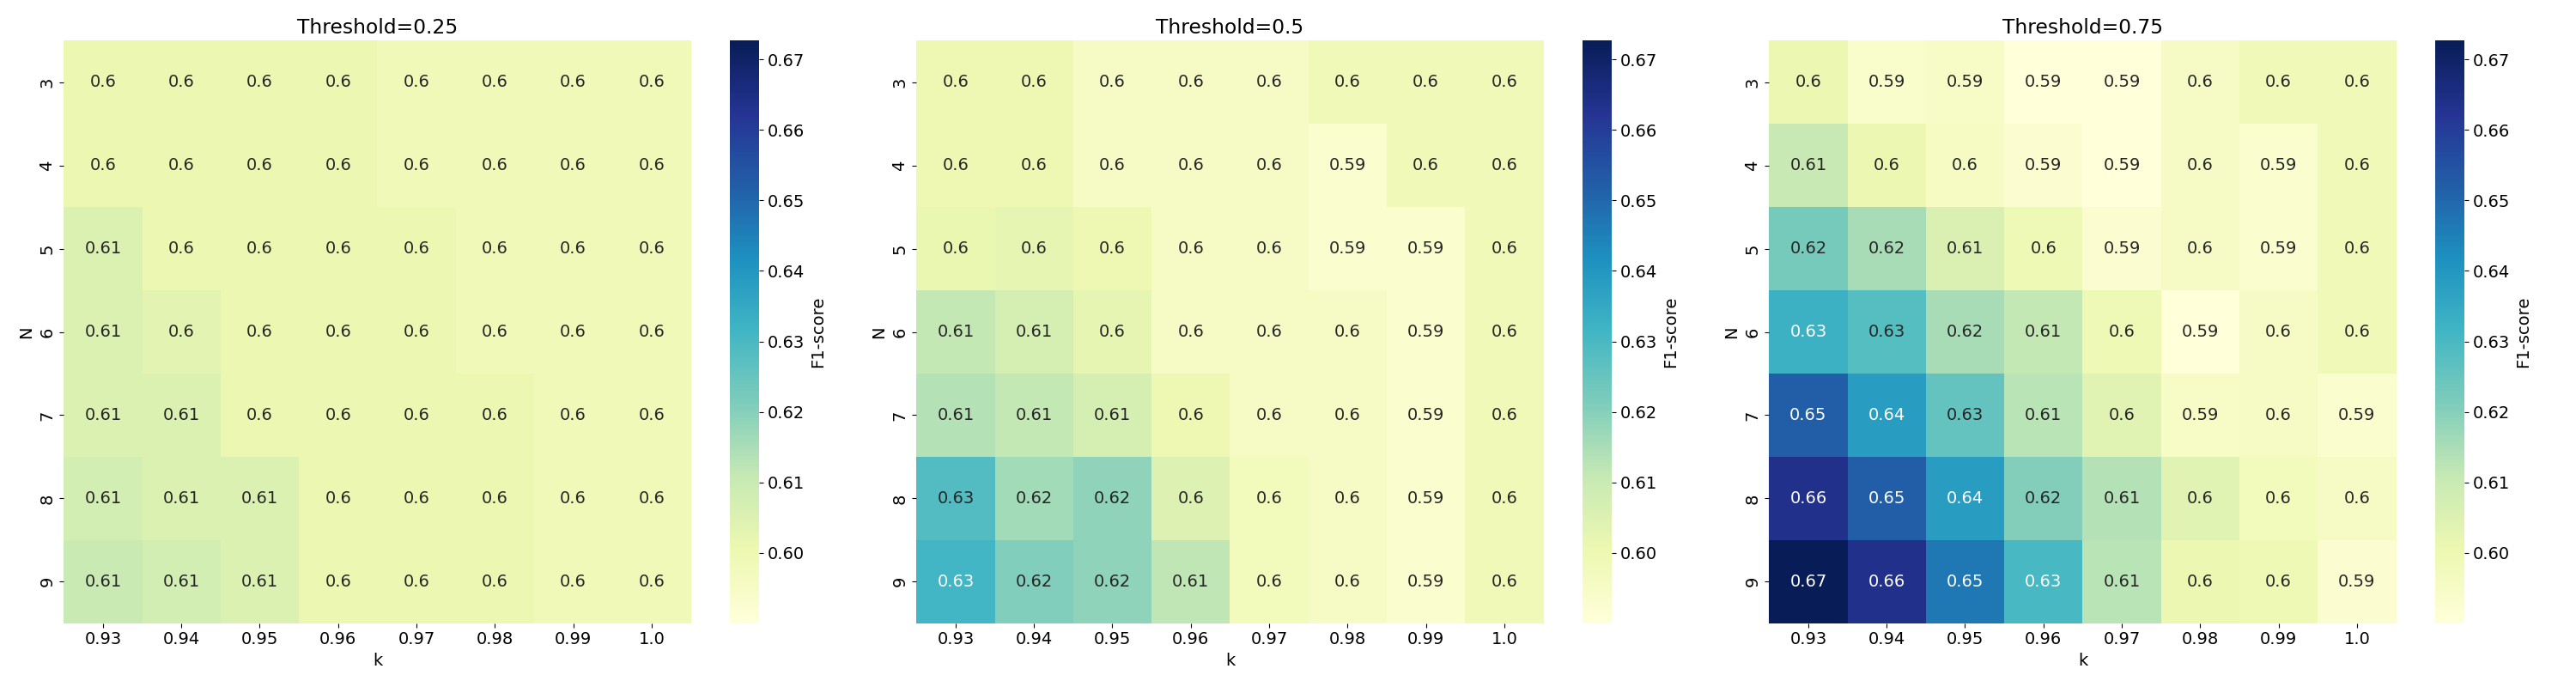

In [25]:
scores_over_params_plot_filename = "_".join([selected_band, selected_score, "over_params"])
scores_over_params_plot_filename += ".png"
scores_over_params_plot_path = plots_dir / scores_over_params_plot_filename

Image(scores_over_params_plot_path)

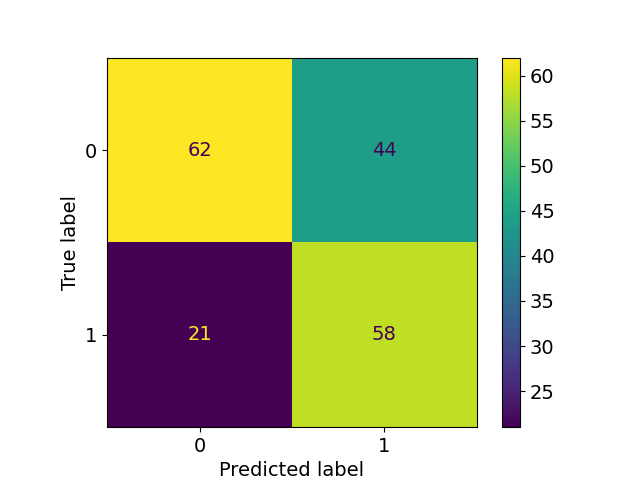

In [26]:
cm_display_filename = "_".join(
        ["max",
         selected_score,
         "cm",
         selected_band])

cm_display_filename += ".png"

cm_display_path = plots_dir / cm_display_filename

Image(cm_display_path)

In [27]:
classification_report_filename = "_".join(
        ["max",
         selected_score,
         "classification_report",
         selected_band]
    )
classification_report_filename += ".csv"
classification_report_path = metrics_dir / classification_report_filename
report_df = pd.read_csv(classification_report_path)

report_df

FileNotFoundError: [Errno 2] No such file or directory: '/home/tcouso/Uni/projects/esn-change-detection/reports/metrics/max_f1_scores_classification_report_nbr.csv'

In [ ]:
detailed_cm_percentages_filename = "_".join(
        ["max",
         selected_score,
         "detailed_per_cm", selected_band,
         ]
    )

detailed_cm_percentages_filename += ".csv"
detailed_cm_percentages_path = metrics_dir / detailed_cm_percentages_filename
detailed_cm_precentages = pd.read_csv(detailed_cm_percentages_path)

detailed_cm_precentages

,change_type,label,prediction,proportion
0,logging,1,1.0,0.275676
1,drought,0,1.0,0.237838
2,stable,0,0.0,0.194595
3,fire,1,1.0,0.108108
4,drought,0,0.0,0.102703
5,fire,1,0.0,0.037838
6,stable,0,1.0,0.037838
7,logging,1,0.0,0.005405


In [ ]:
detailed_cm_abosolutes_filename = "_".join(
        ["max",
         selected_score,
         "detailed_abs_cm", selected_band,
         ]
    )
detailed_cm_abosolutes_filename += ".csv"
detailed_cm_abosolutes_path = metrics_dir / detailed_cm_abosolutes_filename
detailed_cm_abosolutes = pd.read_csv(detailed_cm_abosolutes_path)

detailed_cm_abosolutes

,change_type,label,prediction,count
0,logging,1,1.0,51
1,drought,0,1.0,44
2,stable,0,0.0,36
3,fire,1,1.0,20
4,drought,0,0.0,19
5,fire,1,0.0,7
6,stable,0,1.0,7
7,logging,1,0.0,1


# Plots by event type

In [ ]:
non_change_type = "stable" # stable drought
change_type = "logging" # logging fire

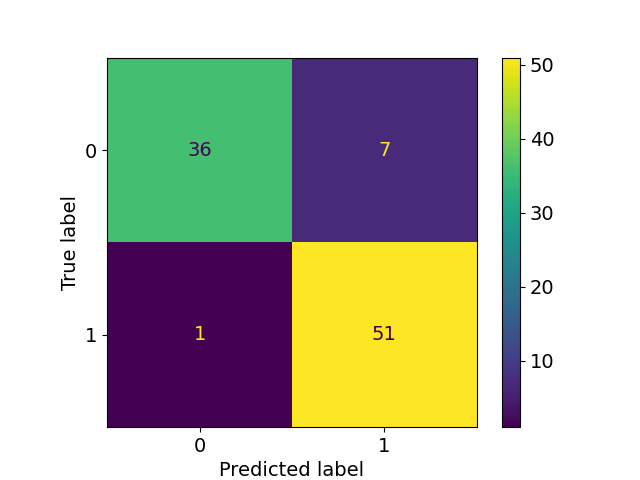

In [ ]:
cm_display_filename = "_".join([
            "max",
            selected_score,
            "cm",
            selected_band,
            non_change_type,
            change_type
        ])

cm_display_filename += ".png"

cm_display_path = plots_dir / cm_display_filename

Image(cm_display_path)

In [ ]:


classification_report_filename = "_".join([
    "max",
    selected_score,
    "classification_report",
    selected_band,
    non_change_type,
    change_type
])
classification_report_filename += ".csv"
classification_report_path = metrics_dir / classification_report_filename
report_df = pd.read_csv(classification_report_path)

report_df

,Unnamed: 0,precision,recall,f1-score,support
0,0,0.972973,0.837209,0.900000,43.000000
1,1,0.879310,0.980769,0.927273,52.000000
2,accuracy,0.915789,0.915789,0.915789,0.915789
3,macro avg,0.926142,0.908989,0.913636,95.000000
4,weighted avg,0.921705,0.915789,0.914928,95.000000
